# Exploratory Analysis of NN

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file produced from the network. 

Note: This the file should contain two the training & validation scores for each of the models (i.e. regular and slow).

In [3]:
df = pd.read_csv("accuracy_metrics")

In [4]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,1.0,0.994236,0.996690,0.793439,0.000283,1.0,0.995578,0.997636,0.818885,0.000283
1,1,2.0,0.995420,0.997163,0.802311,0.000261,2.0,0.996210,0.998109,0.857620,0.000261
2,2,3.0,0.995657,0.997636,0.809854,0.000291,3.0,0.996763,0.998109,0.872645,0.000291
3,3,4.0,0.995973,0.997636,0.813600,0.000283,4.0,0.996921,0.998582,0.880329,0.000283
4,4,5.0,0.996131,0.997636,0.817988,0.000294,5.0,0.997000,0.998582,0.884582,0.000294
...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2996.0,1.000000,0.999527,0.877547,0.000218,2996.0,1.000000,0.999527,0.906119,0.000218
2996,2996,2997.0,1.000000,0.999527,0.878004,0.000192,2997.0,1.000000,0.999527,0.906061,0.000192
2997,2997,2998.0,1.000000,0.999527,0.877877,0.000204,2998.0,1.000000,0.999527,0.906231,0.000204
2998,2998,2999.0,1.000000,0.999527,0.877853,0.000209,2999.0,1.000000,0.999527,0.906025,0.000209


Cleaning the dataframe for readability and graphability.

In [5]:
df = df.drop(['Unnamed: 0', '0', '5'], axis=1).drop([0])

In [6]:
df = df.rename({'1':"Slow Training",'2': "Slow Validation", '3': "Slow Mean", '4': "Slow STE",
                '6':"Reg. Train", '7':"Reg. Validation", '8': "Reg. Mean", '9': "Reg. STE"}, axis=1)

In [7]:
df

,Slow Training,Slow Validation,Slow Mean,Slow STE,Reg. Train,Reg. Validation,Reg. Mean,Reg. STE
1,0.995420,0.997163,0.802311,0.000261,0.996210,0.998109,0.857620,0.000261
2,0.995657,0.997636,0.809854,0.000291,0.996763,0.998109,0.872645,0.000291
3,0.995973,0.997636,0.813600,0.000283,0.996921,0.998582,0.880329,0.000283
4,0.996131,0.997636,0.817988,0.000294,0.997000,0.998582,0.884582,0.000294
5,0.996210,0.997636,0.821451,0.000282,0.997158,0.998582,0.888180,0.000282
...,...,...,...,...,...,...,...,...
2995,1.000000,0.999527,0.877547,0.000218,1.000000,0.999527,0.906119,0.000218
2996,1.000000,0.999527,0.878004,0.000192,1.000000,0.999527,0.906061,0.000192
2997,1.000000,0.999527,0.877877,0.000204,1.000000,0.999527,0.906231,0.000204
2998,1.000000,0.999527,0.877853,0.000209,1.000000,0.999527,0.906025,0.000209


In [8]:
df1 = df.drop(["Slow STE", "Reg. STE"], axis=1)

In [9]:
df1

,Slow Training,Slow Validation,Slow Mean,Reg. Train,Reg. Validation,Reg. Mean
1,0.995420,0.997163,0.802311,0.996210,0.998109,0.857620
2,0.995657,0.997636,0.809854,0.996763,0.998109,0.872645
3,0.995973,0.997636,0.813600,0.996921,0.998582,0.880329
4,0.996131,0.997636,0.817988,0.997000,0.998582,0.884582
5,0.996210,0.997636,0.821451,0.997158,0.998582,0.888180
...,...,...,...,...,...,...
2995,1.000000,0.999527,0.877547,1.000000,0.999527,0.906119
2996,1.000000,0.999527,0.878004,1.000000,0.999527,0.906061
2997,1.000000,0.999527,0.877877,1.000000,0.999527,0.906231
2998,1.000000,0.999527,0.877853,1.000000,0.999527,0.906025


Graphing the plot

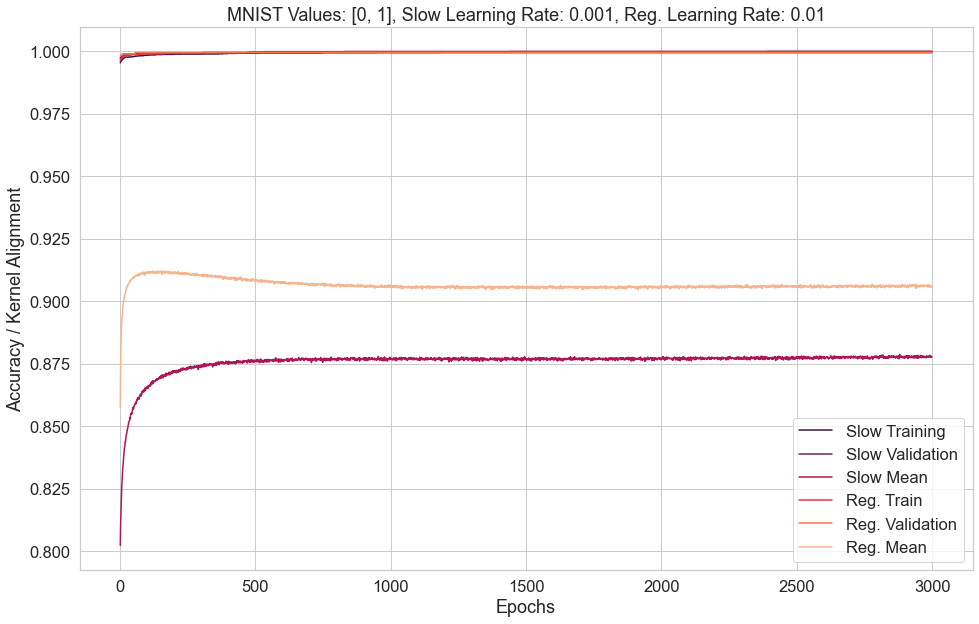

In [20]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
plot = sns.lineplot(data=df1, dashes=False, palette = "rocket");
plot.set_title("MNIST Values: [0, 1], Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("Epochs");
plt.ylabel("Accuracy / Kernel Alignment");

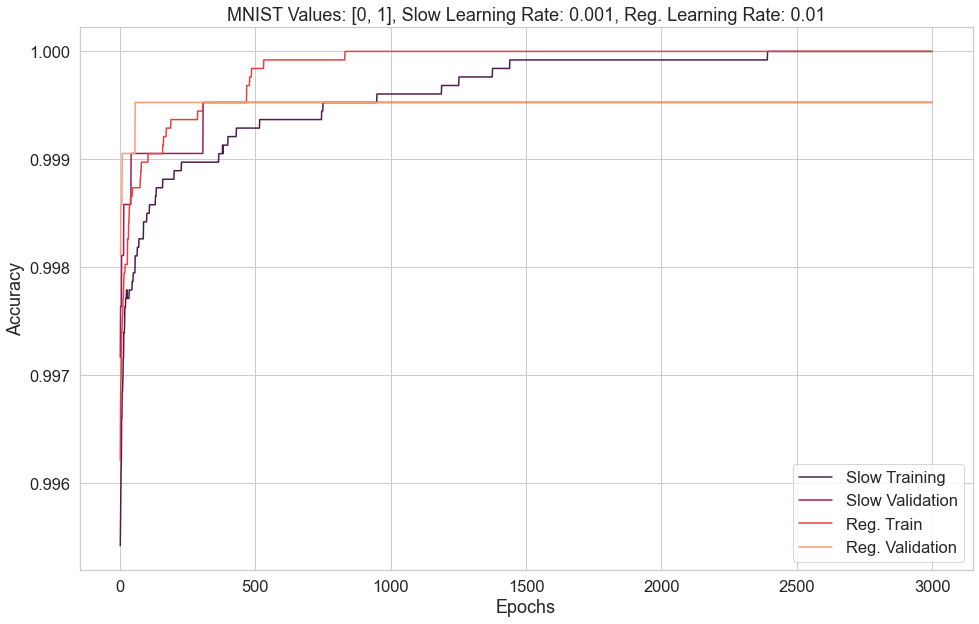

In [21]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
plot = sns.lineplot(data=df[["Slow Training", "Slow Validation", "Reg. Train", "Reg. Validation"]], palette = "rocket", dashes=False);
plot.set_title("MNIST Values: [0, 1], Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");

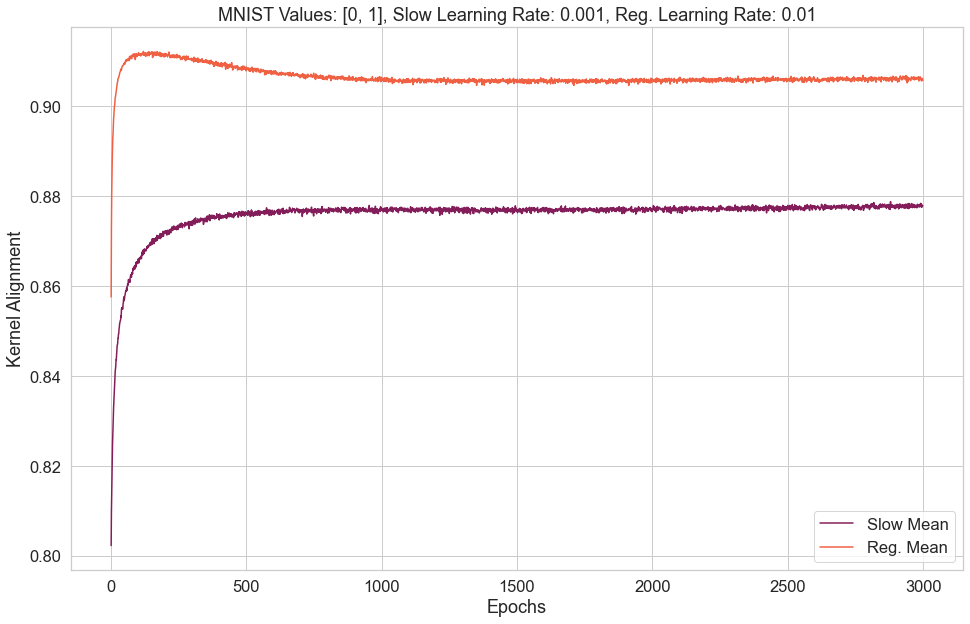

In [25]:
## sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
plot = sns.lineplot(data=df[["Slow Mean", "Reg. Mean"]], palette = "rocket",dashes=False);
plot.set_title("MNIST Values: [0, 1], Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("Epochs");
plt.ylabel("Kernel Alignment");